# Connect Three 

The primary description of this coursework is available on the CM20252 Moodle page. This is the Jupyter notebook you must complete and submit to receive marks. This notebook adds additional detail to the coursework specification but does not repeat the information that has already been provided there. 

You must follow all instructions given in this notebook precisely.

Restart the kernel and run all cells before submitting the notebook. This will guarantee that we will be able to run your code for testing. Remember to save your work regularly.

__You will develop players for Connect-Three on a grid that is 5 columns wide and 3 rows high. An example is shown below showing a win for Player Red.__

<img src="images/connect3.png" style="width: 200px;"/>

## Preliminaries

For your reference, below is a visual depiction of the agent-environment interface in reinforcement learning. The interaction of the agent with its environments starts at decision stage $t=0$ with the observation of the current state $s_0$. (Notice that there is no reward at this initial stage.) The agent then chooses an action to execute at decision stage $t=1$. The environment responds by changing its state to $s_1$ and returning the numerical reward signal $r_1$. 

<img src="images/agent-environment.png" style="width: 500px;"/>

<br><br><br>

Below, we provide some code that will be useful for implementing parts of this interface. You are not obligated to use this code; please feel free to develop your own code from scratch. 

### Code details

We provide a `Connect` class that you can use to simulate Connect-Three games. The following cells in this section will walk you through the basic usage of this class by playing a couple of games.

We import the `connect` module and create a Connect-Three environment called `env`. The constructor method has one argument called `verbose`. If `verbose=True`, the `Connect` object will regularly print the progress of the game. This is useful for getting to know the provided code, debugging your code, or if you just want to play around. You will want to set `verbose=False` when you run hundreds of episodes to complete the marked exercises.

This `Connect` environment uses the strings `'o'` and `'x'` instead of different disk colors in order to distinguish between the two players. We can specify who should start the game using the `starting_player` argument.

In [1]:
#import connect
#env = connect.Connect(starting_player='x', verbose=True)


We can interact with the environment using the `act()` method. This method takes an `action` (an integer) as input and computes the response of the environment. An action is defined as the column index that a disk is dropped into. The `act()` method returns the `reward` for player `'o'` and a boolean, indicating whether the game is over (`True`) or not (`False`). 

In [2]:
#reward, game_over = env.act(action=2)
#print("reward =", reward)
#print("game_over =", game_over)

Because we set `verbose=True` when we created our environment, the grid is printed each time we call the `act()` method. You probably might want to set `verbose=False` when you run Q-learning for thousands of episodes. 

As expected, the `reward` is 0 and no one has won the game yet (`game_over` is `False`). Let us drop another disk into the same column.

In [3]:
#reward, game_over = env.act(action=2)

We see that the `Connect` environment automatically switches the

The `grid` is stored as a two-dimensional `numpy` array in the `Connect` class and you can easily access it by calling...

In [4]:
#current_grid = env.grid
#print(current_grid)

Note that the grid now appears to be "upside down" because `numpy` arrays are printed from "top to bottom".
We can also print it the way it is printed by the Connect class by calling...

In [5]:
#print(current_grid[::-1])

Let's make another move.

In [6]:
#reward, game_over = env.act(action=2)

Let us try to put another disk in the same column with `act(action=2)`. The environment will throw an error because that column is already filled.

In [7]:
# This cell should throw an IndexError!
#env.act(action=2)

The attribute `.available_actions` of the `Connect` class contains a `numpy` array of all not yet filled columns. This variable should help you to avoid errors like the one we have just encountered.

In [8]:
#print(env.available_actions)

Note that column index '2' is missing because this column is already filled.

Let's keep on playing until some player wins...

In [9]:
#reward, game_over = env.act(action=3)
#print("reward =", reward, "game_over =", game_over) 
#reward, game_over = env.act(action=1)
#print("reward =", reward, "game_over =", game_over)
#reward, game_over = env.act(action=3)
#print("reward =", reward, "game_over =", game_over)
#reward, game_over = env.act(action=0)
#print("reward =", reward, "game_over =", game_over)
#reward, game_over = env.act(action=3)
#print("reward =", reward, "game_over =", game_over)

#### Note that the `reward` returned by the `act()` method is the reward for player `'o'`.

You can reset the game using the `reset()` method. This method cleans the grid and makes sure that the it is the `starting_player`'s turn as defined earlier.

In [10]:
#env.reset()
#reward, game_over = env.act(1)

Feel free to modify existing or add new methods to the `Connect` class.

## Q-learning

**Your opponent is always the first player. Your agent is always the second player.**

For your reference, the pseudo-code for Q-learning is reproduced below from the textbook (Reinforcement Learning, Sutton & Barto, 1998, Section 6.5).
<img src="images/q_learning.png" style="width: 600px;"/>

Prepare a **learning curve** following the directions below. We refer to this as Plot 1.

After $n$ steps of interaction with the environment, play $m$ games with the current policy of the agent (without modifying the policy). Think of this as interrupting the agent for a period of time to test how well it has learned so far. Your plot should show the total score obtained in these $m$ games as a function of $n, 2n, 3n, … kn$. The choices of $n$ and $k$ are up to you. They should be reasonable values that demonstrate the efficiency of the learning and how well the agent learns to play the game eventually. Use $m=10$. 

This plot should show the mean performance of `a` agents, not the performance of a single agent. Because of the stochasticity in the environment, you will obtain two different learning curves from two different agents even though they are using exactly the same algorithm. We suggest setting `a` to 20 or higher.

Present a single mean learning curve with your choice of parameters $\epsilon$ and $\alpha$. The plot should also show (as a baseline) the mean performance of a random agent that does not learn but chooses actions uniformly randomly from among the legal actions. Label this line “Random Agent”. 

Please include this plot as a static figure in the appropriate cell below. That is, compute the learning curve in the lab or at home (this may take a couple of minutes depending on your implementation) and save the figure in the same directory as your notebook. Import this figure in the appropriate answer cell under (A). You can look at the source code of this markdown cell (double click on it!) to find out how to embed figures using html. Do **not** use drag & drop to include figures; we would not be able to see them! Make sure to include the locally stored images in your submission. 

In [11]:
### Write all your code for Part 1 within or above this cell. 
import numpy as np
import random
import connect
import copy
import matplotlib.pyplot as plt

def grid_2_string(grid):
    str = ''
    for r in range(3):
        for c in range(5):
            if(grid[r][c] == ' '):
                str += '0'
            else:
                str += grid[r][c]
        str += '/'
    return str

##plays n games without learning
def play_games(table, n):
    env = connect.Connect(starting_player='x', verbose=False)
    score = 0
    
    for play in range(n):
        env.reset()
        
        reward, game_over = env.act(random.choice(env.available_actions))  
        
        while(not game_over):
            state = grid_2_string(env.grid)
            avail_act = env.available_actions
            
            for i in avail_act:
                if((str(i) + ":" + state) not in table):
                    table[(str(i) + ":" + state)] = 0.0

            max = table[(str(avail_act[0]) + ":" + state)]
            list = []
            for i in avail_act:
                value = table[(str(i) + ":" + state)]
                if(value == max):
                     list.append(i)
                elif(value > max):
                    max = value
                    list = [i]
            action = random.choice(list)

            reward, game_over = env.act(action)
            if(game_over):
                score += reward
            else:
                reward, game_over = env.act(random.choice(env.available_actions))        
                if(game_over):
                    score += reward
                    
    return score


#def maxq(grid, qtable):
#    maxqv = -1
#    state = grid_2_string(grid)       
#    for i in range(5):
#        key = str(i) + ':' + state          
#        if(key in qtable):
#            value = qtable[key]
#            if(value > maxqv):            
#                maxqv = value
#    return maxqv

##checks if non learning games should be played
def check_play(inter, n):
    if(inter > 0):
        if(inter % n == 0):
            return True
    return False

##mirrors the action state
def reverse_state(state):
    reverse_state = str(4 - int(state[0])) + ':'
    mini_state = ''
    
    for i in range(18):
        if(state[i+2] != '/'):
            mini_state += state[i+2]
        else:
            reverse_state += mini_state[::-1] + '/'
            mini_state = ''
    return reverse_state


def get_performance(n, k, a):
    env = connect.Connect(starting_player='x', verbose=False)
    run_run_score = np.zeros(shape=(k))
    qtable = {}
    for ag in range(a):
        epsil = 0.2
        alph = 0.1
        inter = 0
        run_score = np.zeros(shape=(k))
        qtable.clear()
        while(inter <= (k*n)):
            env.reset()
            current_grid = env.grid

            reward, game_over = env.act(random.choice(env.available_actions))
            
            curr_state = str(random.choice(env.available_actions)) + ':' + grid_2_string(current_grid)
            
            while(not game_over):
                ##initiales new grid and the available moves
                state = grid_2_string(env.grid)
                avail_act = env.available_actions

                ##makes sure all action states an their reverses are in the qtable
                for i in avail_act:
                    if((str(i) + ":" + state) not in qtable):
                        qtable[(str(i) + ":" + state)] = 0.0
                        qtable[reverse_state(str(i) + ":" + state)] = 0.0

                ##chance for random
                if np.random.random() < epsil:
                    action = random.choice(avail_act)
                ##else find largest q value from availble moves
                else:
                    max = qtable[(str(avail_act[0]) + ":" + state)]
                    list = []
                    for i in avail_act:
                        value = qtable[(str(i) + ":" + state)]
                        if(value == max):
                            list.append(i)
                        elif(value > max):
                            max = value
                            list = [i]
                    action = random.choice(list)
                chosen_state = str(action) + ":" + state

                ##ai and rand make a move
                meward, game_overa = env.act(action)
                reward, game_overb = env.act(random.choice(env.available_actions))
                
                if(meward > 0):
                    reward = 0
                
                ##finds maximum obtainable q value from the chosen state
                #maxqv = -10
                #for i in range(5):
                #    key = str(i) + ':' + grid_2_string(current_grid)       
                #    if(key in qtable):
                #        value = qtable[key]
                #        if(value > maxqv):            
                #            maxqv = value                
                
                #new_q = qtable[chosen_state] + alph*(meward + reward + maxqv - qtable[chosen_state])
                
                new_q  = qtable[curr_state] + alph * (meward + reward + qtable[chosen_state] - qtable[curr_state])
                qtable[curr_state] = new_q
                qtable[reverse_state(curr_state)] = new_q
                curr_state = chosen_state

                inter += 1
                
                if(inter > (k*n)):
                    break
                if(check_play(inter, n)):
                    run_score[int(inter/n)-1] = play_games(copy.deepcopy(qtable), 10)
                
                game_over = game_overa or game_overb
            epsil*=0.999
            #alph-=0.1*(1/(n*k))

        for i in range(k):  
            run_run_score[i] += run_score[i]
        #print(qtable)
        #print('next')
    return run_run_score/a

##plays games using random moves
def play_rand(n):
    score = 0
    env = connect.Connect(starting_player='x', verbose=False)
    for play in range(n):
        env.reset()
        game_over = False
        while(not game_over):
            reward, game_over = env.act(random.choice(env.available_actions))
            if(game_over):
                score += reward
            else:
                reward, game_over = env.act(random.choice(env.available_actions))        
                if(game_over):
                    score += reward           
    return score


def get_rand_perf(k, a):
    run_run_score = np.zeros(shape=(k))
    for ag in range(a):
        run_score = np.zeros(shape=(k))
        for i in range(k):
            run_score[i] = play_rand(10)
        run_run_score += run_score 
    return run_run_score/a


def plot_graph_rand(x_axis, y_axis, y_axis_rand):    
    fig, ax = plt.subplots()
    
    line1, = ax.plot(x_axis, y_axis, 'b-', label='Learning Agent')
    line2, = ax.plot(x_axis, y_axis_rand, 'r-', label='Random Agent')

    ax.legend(loc='lower right')
    plt.show()

    
def plot_graph(x_axis, y_axis):
    plt.plot(x_axis, y_axis, 'b-')
    plt.show

#n=1500
#k=100
#a=20
#rand_perf = get_rand_perf(k, a)
#perf = get_performance(n, k, a)

#x_axis = np.zeros(shape=(k))
#for q in range(k):
#    x_axis[q] = (q+1)*(n)
#plot_graph_rand(x_axis, perf, rand_perf)


(A) [continued} Insert your static learning curve here (Plot 1).

<img src="images/perf_graph_2.PNG"/>


(B) In 3 sentences or less, explain your conclusions from the plot above. How close does your (average) agent get to the best possible level of performance? How efficiently does your (average) agent learn? 

The average agent plateaus at about 6 points after about 60,000 interactions, this is less than ideal but it does mean it is potentially winning 8 out of the 10 games (and losing the other 2). The code runs slower than I would like, I suspect this may be due to the large dictionaries required


(C) In five sentences or less, explain the key aspects of your implementation. How many state-action pairs do you represent in your Q-table? Describe and justify your settings of $\alpha$ and $\epsilon$. Are there any things you tried out that are not in your final implementation?

Every state is mirrored so all possible states are added twice as fast as they would otherwise. 
Epsilon starts off relatively large at 0.2, this is so that the agent explores as much as possible when first starting out, but as the estimates get better epsilon decreases so the agent realises more on the accuracy of the q values.
Alpha is initially set to 0.15. I have experimented with increasing over time as the estimates get better, so they are weighted more than the current value, but the results were similar so I decided against it.


(D) In the cell below, make it possible for us to produce from scratch a learning curve similar to Plot 1 but for a single agent, for a $k$ value of your own choosing. You do not need to include the baseline for random play.  This code should run in less than 30 seconds (ours runs in 2 seconds). 


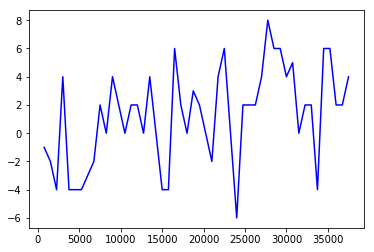

In [12]:
### This cell should produce from scratch a plot showing a learning curve for a single agent.
import connect
env = connect.Connect(starting_player='x', verbose=False)
n=750
k=50
a=1
perf = get_performance(n, k, a)
x_axis = np.zeros(shape=(k))

for q in range(k):
    x_axis[q] = (q+1)*(n)
plot_graph(x_axis, perf)

# IMPORTANT: How to submit.

If any of the following instructions is not clear, please ask your tutors well ahead of the submission deadline.

### Before you submit
- We will not be able to mark your coursework if it takes more than 1 minutes to execute your entire notebook. That is, comment out (but do not delete) the code that you used to produce Plot 1 (i.e., learning curve averaged across many agents). Do **not** comment out the code that you use to produce a learning curve for a single agent (Exercise D).
- Restart the kernel (_Kernel $\rightarrow$ Restart & Run All_) and make sure that you can run all cells from top to bottom without any errors.
- Make sure that your code is written in Python 3 (and not in Python 2!). You can check the Python version of the current session in the top-right corner below the Python logo.

### Submission file
- Please upload to Moodle a .zip file (**not** `.rar`, `.7z`, or any other archive format) that contains the completed Jupyter notebook (`ai4_connect_three.ipynb`) as well as the pre-computed figure(s). 
- **If** you change the `connect.py` file or write your own version of the environment, include the corresponding file in your submission, but give it any other name than `connect.py`. If you do not change its name, it will be overwritten  and we won't be able to execute your code! Make sure that you import the correct module when you rename your file, for example, use `import myConnect` if your file is called `myConnect.py`.
- Do not include any identifying information. Not in the code cells, not in the file names, nowhere! Marking is anonymous.